In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In this notebook linear, polynomial, decision tree regressions will be briefly covered. Note that, train test split and standardization/normalization are normally very important steps in a regression analysis.

### Let's read data first

In [63]:
data1 = pd.read_csv("linear-regression-dataset.csv", sep=';')
data1.rename(columns={'deneyim':'experience', 'maas':'salary'}, inplace=True)
data1.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


### Plot Data

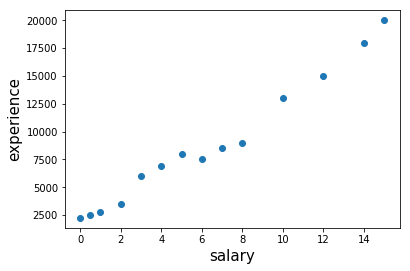

In [12]:
plt.scatter(data1.experience, data1.salary)
plt.xlabel('salary', fontsize=15)
plt.ylabel('experience', fontsize=15)
plt.show()

Sklearn library requires the shape of columns in a (number, number) format. As you can see below skalar type of shape is not accepted. So, we have to use reshape(-1,-1) function 

In [22]:
# .values = numpy array conversion
# .reshape(-1,1)  = (14,) -> (14,1)

x = data1.experience.values
y = data1.salary.values
print('x shape: {}\ny shape: {}'.format(x.shape, y.shape))

x shape: (14,)
y shape: (14,)


In [24]:
# x = data1.experience.values.reshape(-1,1)
# y = data1.salary.values.reshape(-1,1)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print('x shape: {}\ny shape: {}'.format(x.shape, y.shape))

x shape: (14, 1)
y shape: (14, 1)


AN IMPORTANTANT NOTE: Normally data must be splitted into train and test data. In this notebook these data are just too small and imaginery. The purpose of this notebook is to explain the use of sklearn library and show the main regression types

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

# Prediction
# To get the intercept (b0), following two can be written. Both are the same:
b0 = lr.predict([[0]])
print('intercept(b0): ',b0)

b0 = lr.intercept_
print('intercept(b0): ',b0)

# To get the slope (b1):
b1 = lr.coef_
print('slope(b1): ',b1)

# example: 11 years of experience
print('Predicted salary for 11 years of experience: ',lr.predict([[11]]))


intercept(b0):  [[1663.89519747]]
intercept(b0):  [1663.89519747]
slope(b1):  [[1138.34819698]]
Predicted salary for 11 years of experience:  [[14185.72536421]]


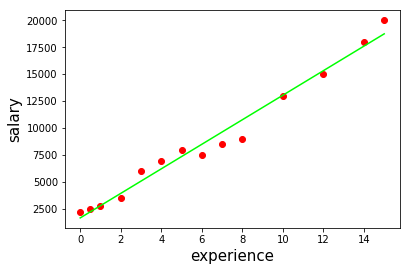

In [38]:
# Create an array from 0 to 15 (years)
array1= np.array([0,0.5,1,2,3,4,5,6,7,8,10,12,14,15]).reshape(-1,1)
# array1.shape

# y_head: predicted values for each input
y_head = lr.predict(array1)

plt.scatter(x, y, color= 'red')
plt.plot(array1, y_head, color='lime')
plt.xlabel('experience', fontsize=15)
plt.ylabel('salary', fontsize=15)
plt.show()

R2 Score shows us how well the model explains the actual data. This time because we are working with random-ish and small data and also didn't apply train test split, it shows a low ratio but to give an idea we can briefly have a look at it.

In [52]:
# R2 Score
# It should normally be checked with test data. Checking it with the same data we trained the model doesn't have much meaning.
y_head = lr.predict(array1)

from sklearn.metrics import r2_score
print('R2 score: ',r2_score(y, y_head))

R2 score:  0.07651611388056012


### Multiple Linear Regression 

In [42]:
data2 = pd.read_csv('multiple-linear-regression-dataset.csv', sep=';')
data2.rename(columns={'deneyim':'experience', 'maas':'salary', 'yas':'age'}, inplace=True)
data2.head()

,experience,salary,age
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [44]:
x = data2.iloc[:,[0,2]].values # Because x is wider than 1 column, it doesn't need to be reshaped.
y = data2.salary.values.reshape(-1,1)

In [49]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x, y)

print('intercept(b0): ',mlr.intercept_)
print('coefficients(b1, b2): ',mlr.coef_)

# A mini prediction example: Prediction of two persons salaries; both 10 years exp. one is 35 other is 40 years old.
mlr.predict(np.array([[10,35],[10,40]]))

intercept(b0):  [10376.62747228]
coefficients(b1, b2):  [[1525.50072054 -416.72218625]]


array([[11046.35815877],
       [ 8962.7472275 ]])

### Polynomial Linear Regression

Sometimes data cannot be explained with a linear relationship. This mean Linearity Assumption of linear regression is violated. We cannot use simple linear regression in this case. 

In [54]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

dataP = pd.read_csv('polynomial-regression.csv', sep = ';')
dataP.rename(columns={"araba_fiyat": "price", "araba_max_hiz": "max_speed"}, inplace=True)
dataP.head()

,price,max_speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


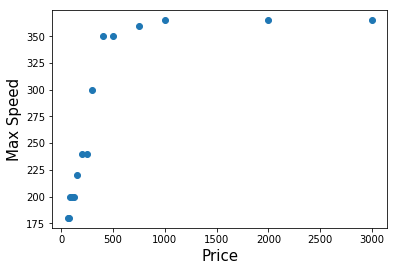

In [55]:
x = dataP.price.values.reshape(-1,1)
y = dataP.max_speed.values.reshape(-1,1)

plt.scatter(x, y)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Max Speed', fontsize=15)
plt.show()

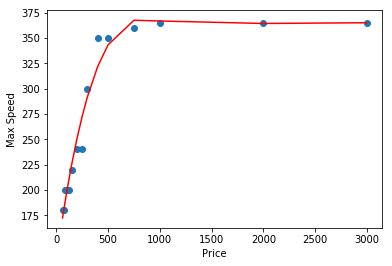

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# There are some methods to determine the degree of polynomiality, but you can also check manually and find the best degree.
# Tuning parameters and hyperparameters will be mentioned in other repositories. 

pr = PolynomialFeatures(degree = 4)
xpol = pr.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(xpol, y)

y_head2 = lr2.predict(xpol)

# Plotting data will tell us things much better.
plt.scatter(x, y)
plt.xlabel('Price')
plt.ylabel('Max Speed')
plt.plot(x, y_head2, color='red')
plt.show()

### Linear vs. Polynomial: Comparison

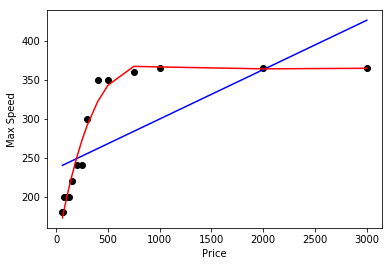

In [57]:
# Linear
lr1 = LinearRegression()
lr1.fit(x, y)
y_head1 = lr1.predict(x)

#Polynomial
pr = PolynomialFeatures(degree = 4)
xpol = pr.fit_transform(x)
lr2 = LinearRegression()
lr2.fit(xpol, y)
y_head2 = lr2.predict(xpol)

# plot below explains everything
plt.scatter(x, y, color = 'black')
plt.xlabel('Price')
plt.ylabel('Max Speed')
plt.plot(x, y_head1, color='blue')
plt.plot(x, y_head2, color='red')
plt.show()

Plot above shows very clearly that polynomial curve explains data better. According to linear regression curve, most expensive cars should have been as fast as airplanes.

### Decision Tree Regression

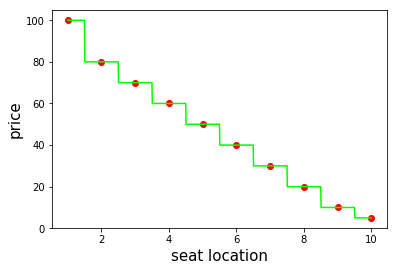

In [60]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

DecTree = pd.read_csv('decision-tree-regression-dataset.csv', sep = ';', header=None)
#DecTree.head()

# using .iloc is just another way of telling computer to select which columns
x = DecTree.iloc[:,0].values.reshape(-1,1)
y = DecTree.iloc[:,1].values.reshape(-1,1)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()  # random state = 0

tree.fit(x, y)
#tree.predict(5.5)

x_new = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = tree.predict(x_new)

plt.scatter(x, y, color='red')
plt.plot(x_new, y_head, color='lime')
plt.xlabel('seat location', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

### Decision Tree Regression 2 (Let's change the data a little bit)

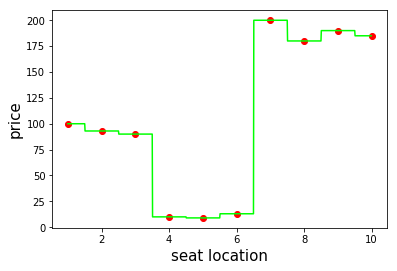

In [61]:
DecTree = pd.read_csv('decision-tree-regression-dataset.csv', sep = ';', header=None)
DecTree.iloc[0:10,1] = [100,93, 90, 10, 9, 13, 200, 180,190, 185]
# DecTree

# using .iloc is just another way of telling computer to select which columns
x1 = DecTree.iloc[:,0].values.reshape(-1,1)
y1 = DecTree.iloc[:,1].values.reshape(-1,1)

from sklearn.tree import DecisionTreeRegressor
tree2 = DecisionTreeRegressor()  # random_state = 0

tree2.fit(x1, y1)
#tree.predict(5.5)

x1_new = np.arange(min(x1),max(x1),0.01).reshape(-1,1)
y1_head = tree2.predict(x1_new)

plt.scatter(x1, y1, color='red')
plt.plot(x1_new, y1_head, color='lime')
plt.xlabel('seat location', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

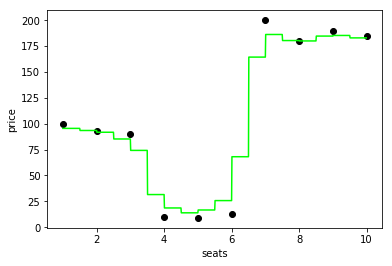

In [124]:
# Random Forests Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_forest = pd.read_csv('decision-tree-regression-dataset.csv', sep = ';', header=None )
data_forest.iloc[0:10,1] = [100,93, 90, 10, 9, 13, 200, 180,190, 185]

x2 = data_forest.iloc[:,0].values.reshape(-1,1)
y2 = data_forest.iloc[:,1].values.reshape(-1,1)

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model = rf.fit(x2, y2.ravel()) # this time .ravel() was necessary(???)

x3 = np.arange(min(x2), max(x2), 0.01).reshape(-1,1)
y3 = model.predict(x3)

plt.scatter(x2, y2, color='black')
plt.plot(x3, y3, color='lime')
plt.xlabel('seats')
plt.ylabel('price')
plt.show()

I hope found this notebook useful. To repeat again: R2 score must be checked with test data and in order to have test data it should normally be splitted. Standardizing/Normalizing data is also another crucial thing, which I will be covering in other notebooks.